# Mean-Variance Model

The Mean-Variance Model aims to determine a weight vector $w$ that strikes a balance between risk and return. This is achieved by minimizing the portfolio risk ($\sigma$) while simultaneously maximizing the expected returns $\mu_p = E(z)$.


For a given set of weights $w$, the portfolio returns can be expressed as $z_p = z^t w$, accompanied by a corresponding risk $\sigma^2_p = w^t \Sigma w$. Each weight vector $w$ maps to a specific point in the $(\mu, \sigma)$ plane, forming the efficient frontier.

I will be using the follwing acronyms to refer to the two different types of portfolios:
1. **Basic Portfolio**: Portfolio without Risk-Free Rate
2. **RFR Portfolio**: Portfolio with Risk-Free Rate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('resources/MVM_data.csv')
r = 0.04
R = np.full(6, r)
mu = data['mu'].to_numpy()
cov = data.iloc[:, 2:].to_numpy()
icov = np.linalg.inv(cov)

## Efficient Portfolios

Efficient portfolios lie on the efficient frontier, representing the optimal trade-off between risk and return. These portfolios minimize variance for a given expected return or maximize expected returns for a given level of risk.

### Basic Portfolio

To find the minimum variance portfolio for a specific expected return ($\mu_o$), an optimization is performed with two constraints:

- $\sum w_i = 1$ where $w_i \geq 0$
- $\sum E(z_i) w_i = \mu_o$

One common approach is using Lagrange Multipliers. However, I've chosen a geometric solution in ${\rm I\!R}^n$ with the inner product metric $\Sigma$ defined as $<u, v> = u^t \Sigma v$, where $u$ and $v$ are portfolio weights.

Then a porfolio $u=(u_i)$ is a vector of ${\rm I\!R}^n$ with lenght $\sqrt{<u, u>}=\sqrt{\sigma^2_u}$ and angle $cos{\theta} = \frac{<u, u>}{\sqrt{<u, u><v, v>}}$.

Using the inner product metric $\Sigma$ and the optimization restricitions we can find the mathematical expressions for this approach:


1.  The direction vector $v_1$ of the porfolio hyperplane is given by $<w,v_1>=1$:

$$
v_1 = \Sigma^{-1}1 \rightarrow <w,v_1>= w^t \Sigma (\Sigma^{-1}1) =  \sum w_i =1
$$

Giving the **Global Minimum Variance Portfolio** ($w_g$):

$$
w_{g} =  \frac{v_1}{<v_1,v_1>} = \frac{v_1}{1^t \Sigma^{-1}1}
$$

2. The direction vector $v_\mu$ of the porfolio hyperplane with expected returns $\mu_p$ is given by $<w,v_\mu>=\mu_p$: 

$$
v_\mu = \Sigma^{-1}\mu \rightarrow <w,v_\mu>= w^t \Sigma (\Sigma^{-1}\mu) =  \sum w_i \mu_i = \mu_p
$$
    
Giving the **Portfolio with $\mu_o$ Mean of Returns**  ($w_d$):

$$
w_{d} = \frac{v_\mu}{<v_\mu,v_\mu>} = \frac{v_\mu}{\bar{z}^t \Sigma^{-1}1}
$$

I could be useful to visualize a representation of ${\rm I\!R}^n$ where the blue line represents the portfolio hyperplane:

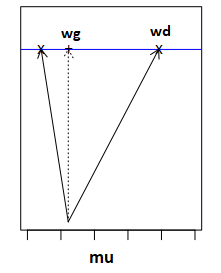

In [3]:
v1 = icov.sum(axis=1)
wg = v1/v1.sum()

vm = np.matmul(icov, mu)
wd = vm/vm.sum()

Deriving the returns and variances of these portfolios is a straightforward process:

$$
\mu_g = E(z) w_g^t \quad , \quad \sigma^2_g = w_g^t \Sigma w_g
$$
$$
\mu_d = E(z) w_d^t \quad , \quad \sigma^2_d = w_d^t \Sigma w_d
$$


In [4]:
zg = np.dot(np.transpose(mu), wg)
varg = np.matmul(np.matmul(np.transpose(wg), cov), wg)

zd = np.dot(np.transpose(mu), wd)
vard = np.matmul(np.matmul(np.transpose(wd), cov), wd)

The shortest distance between a point and the intersection of two hyperplanes is in the direction given by a specific linear combination of the direction vectors. 

Therefore, the portfolios represented by $w_\lambda$ have the minimum variance when the expected return is $\mu = \mu_\lambda$.

$$
w_\lambda = (1 - \lambda) \cdot w_g + \lambda\cdot w_d 
$$

with returns and variances:

$$ \mu_\lambda = \mu_g + \lambda \cdot (\mu_d - \mu_g) $$

$$ \sigma^2_\lambda = \sigma^2_g + \lambda^2 \cdot (\sigma^2_d - \sigma^2_g) $$

**Minimum Variance Portfolios** will be for $\lambda \in {\rm I\!R}$ and **Efficient Portfolios** for $\lambda>0$.

In [5]:
lamb = np.linspace(-2, 2, 400)

In [6]:
b_zlamb = zg + np.dot(lamb, (zd-zg))
b_varlamb = varg + np.dot(lamb**2, (vard - varg))

### RFR Portfolio

When incorporating the risk free rate $R$ some changes need to be made that will shift the final optimal portfolio outcome.

The weights of the portfolio will be $w_p = w_r + w_s = 1$ where $w_r$ is the RFR weight and return $R$ and $w_s$ are the stock weights with return $\mu$. 

Then the constrains are changed:
1. $\sum w_{s_{i}} = 1 - w_r$ 
2. $\sum (\mu_i - R) w_{s_{i}} = \mu - R$

Similar as before, using the inner product metric $\Sigma$ and the optimization restricitions we can find the mathematical expressions for this approach:

1. The **Global Minimum Variance Portfolio** is $w_g=w_r$

2. The direction vector $v_t$ of the porfolio hyperplane with expected returns $\mu$ is given by $<w,v_t>=\mu - R$:

$$
v_t = \Sigma^{-1}(\mu-r) \rightarrow <w,v_1>= w^t \Sigma (\Sigma^{-1}(\mu-r)) = \sum (\mu_i - R) w_{s_{i}} = \mu - R
$$

Then the portfolio weights are
$$
w_t = \frac{v_t}{1 - w_r} = \frac{v_t}{\sum w_{t_{i}}}
$$
with returns and variances
$$
\mu_t = \mu w_t^t \quad , \quad \sigma^2_t = w_t^t \Sigma w_t
$$

Therefore, the portfolios represented by $w_\lambda$ have the minimum variance when the expected return is $\mu = \mu_\lambda$.

$$
w_\lambda = (1 - \lambda) \cdot w_r + \lambda\cdot w_t \quad , \quad \mu_\lambda = r + (\mu_t-r) \lambda  \quad , \quad \sigma_\lambda = \lambda^2 \sigma_t
$$

In [7]:
vt = vm - R*v1
wt = vt/vt.sum()

zt = np.dot(np.transpose(mu), wt)
vart = np.matmul(np.matmul(np.transpose(wt), cov), wt)

zlamb = r + (zt-r) * lamb
varlamb = lamb**2 * vart

## Optimal Portfolio

From the set of efficient portfolios, investors can tailor their choices based on individual risk preferences and return objectives. The utility function, specific to each investor, plays a crucial role in this process. It helps determine the optimal portfolio by quantifying an investor's risk appetite and desired return profile.

The utility function used in this project is:

$$
V(\mu,\sigma) = \mu - 0.04*\sigma^2
$$

From the set of **efficient portfolios** $w_\lambda$, the one that maximizes the utility function this will be the **optimal portfolio** $w_o$. This is a unvariant optimization process where there's only one maximum.

### Basic Portfolio

Optimal Lambda:  0.5563909774436091


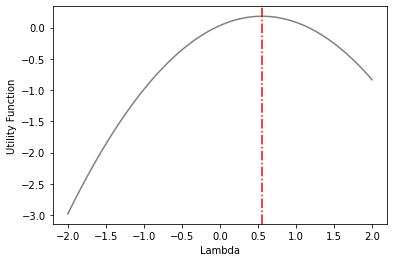

Optimal Portfolio Weights w/o R: 
 [-0.01179935  0.18550066  0.44266421  0.19294013  0.10077813  0.08991622]


In [8]:
b_f = b_zlamb - 0.04*b_varlamb
b_index = b_f.argmax()
print("Optimal Lambda: ", lamb[b_index])

plt.plot(lamb, b_f, c='gray')
plt.axvline(x=lamb[b_index], c='red', linestyle='-.')

plt.xlabel('Lambda')
plt.ylabel('Utility Function')
plt.show()

# Optimal Portfolio Weights w/o R
b_wo = wg + lamb[b_index]*(wd-wg)
print("Optimal Portfolio Weights w/o R: \n", b_wo)

### RFR Portfolio

Optimal Lambda:  0.48621553884711766


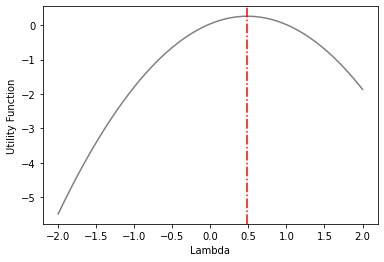

Optimal Portfolio Weights: 
 R: 0.5137844611528823 [0.13946664 0.04014601 0.05911913 0.07977087 0.15311503 0.01459787]


In [9]:
f = zlamb - 0.04*varlamb
index = f.argmax()
print("Optimal Lambda: ", lamb[index])

plt.plot(lamb, f, c='gray')
plt.axvline(x=lamb[index], c='red', linestyle='-.')

plt.xlabel('Lambda')
plt.ylabel('Utility Function')
plt.show()

# Optimal Portfolio Weights
wo = lamb[index]*wt
print("Optimal Portfolio Weights: \n", f"R: {(1-lamb[index])}", wo)

## Plot Portfolios

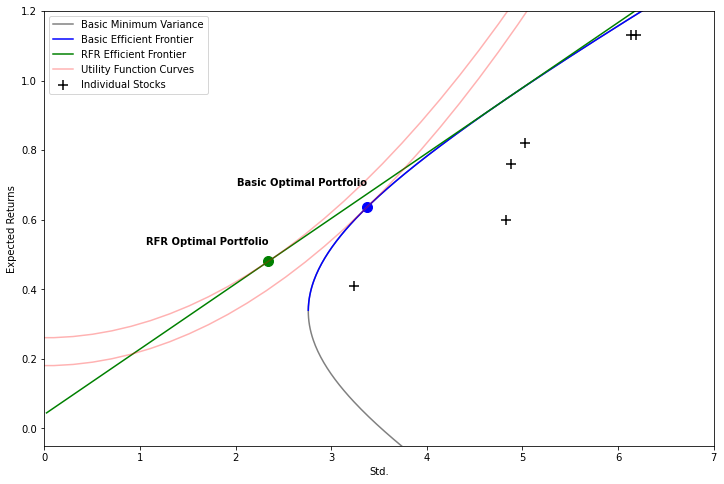

In [10]:
plt.figure(figsize=(12, 8))

# Minimum Variance w/o R
plt.plot(np.sqrt(b_varlamb), b_zlamb, c='gray',
         label='Basic Minimum Variance')

# Efficient Frontier w/o R
plt.plot(np.sqrt(np.split(b_varlamb, 2)[1]), np.split(b_zlamb, 2)[1], c='blue',
         label='Basic Efficient Frontier')

# Efficient Frontier
plt.plot(np.sqrt(np.split(varlamb, 2)[1]), np.split(zlamb, 2)[1], c='green',
         label='RFR Efficient Frontier')

# Stocks
variances = cov.diagonal()
plt.scatter(np.sqrt(variances), mu, c='black', marker='+', s=100,
            label='Individual Stocks')

# Optimal Porfolio w/o R
plt.scatter(np.sqrt(b_varlamb[b_index]), b_zlamb[b_index], c='blue', s=100)
plt.text(np.sqrt(b_varlamb[b_index]), 1.1*b_zlamb[b_index], f'Basic Optimal Portfolio', ha='right', weight='bold')

# Optimal Portfolio
plt.scatter(np.sqrt(varlamb[index]), zlamb[index], c='green', s=100)
plt.text(np.sqrt(varlamb[index]), 1.1*zlamb[index], f'RFR Optimal Portfolio', ha='right', weight='bold')

# Utility Function Curves
x_values = np.linspace(-10, 10, 100)
y_values = b_f[b_index] + 0.04 * x_values**2
plt.plot(x_values, y_values, c='red', alpha=0.3)
y_values = f[index] + 0.04 * x_values**2
plt.plot(x_values, y_values, c='red', alpha=0.3, label='Utility Function Curves')

plt.xlim(0, 7)
plt.ylim(-0.05,1.2)
plt.xlabel('Std.')
plt.ylabel('Expected Returns')
plt.legend()

plt.show()

## Risk Decomposition

### Basic Portfolio
The risk of a portfolio without risk free rate can be decomposed as following:
1. **Inevitable**: Is the global minimum variance portfolio risk $\sigma_g$.
2. **Systematic**: Is the risk associated to the expected return.
3. **Diversifiable**: Is the differance between the portofio and an efficient portfolio with the same expected return. This is evitable.

In [11]:
b_risk_decomp = pd.DataFrame(columns=['Mu', 'Var', 'Lambda',
                                      'Inevitable', 'Efficient',
                                      'Systematic', 'Diversifiable'])

In [12]:
b_risk_decomp['Mu'] = mu
b_risk_decomp['Var'] = variances
b_risk_decomp['Lambda'] = (mu-zg)/(zd-zg)
b_risk_decomp['Efficient'] = varg + b_risk_decomp['Lambda']**2*(vard-varg) # Risk if it was an efficient portfolio
b_risk_decomp['Inevitable'] = varg
b_risk_decomp['Systematic'] = b_risk_decomp['Efficient'] - b_risk_decomp['Inevitable']
b_risk_decomp['Diversifiable'] = b_risk_decomp['Var'] - b_risk_decomp['Efficient']

In [13]:
b_wo_row ={'Mu': b_zlamb[b_index],
            'Var': b_varlamb[b_index],
            'Lambda': lamb[b_index],
            'Inevitable': varg,
            'Efficient': varg + b_zlamb[b_index]**2*(vard-varg),
            'Systematic': (b_varlamb[b_index]-varg),
            'Diversifiable': 0}
b_wo_row = pd.DataFrame(b_wo_row, index=['b_wo'])
b_risk_decomp = pd.concat([b_risk_decomp, b_wo_row])

In [14]:
b_risk_decomp

,Mu,Var,Lambda,Inevitable,Efficient,Systematic,Diversifiable
0,1.130000,37.58000,1.479616,7.621988,34.162799,26.540811,3.417201
1,0.760000,23.80000,0.789278,7.621988,15.174242,7.552254,8.625758
2,0.410000,10.47000,0.136256,7.621988,7.847064,0.225076,2.622936
3,0.820000,25.30000,0.901225,7.621988,17.468505,9.846517,7.831495
4,1.130000,38.22000,1.479616,7.621988,34.162799,26.540811,4.057201
5,0.600000,23.31000,0.490754,7.621988,10.541726,2.919738,12.768274
b_wo,0.635179,11.37497,0.556391,7.621988,12.513119,3.752982,0.000000


### RFR Portfolio
The risk of a portfolio with risk free rate can be decomposed as following:
1. **Inevitable**: Since there is a RFR all risk is evitable.
2. **Systematic**: Is the risk associated to the expected return.
3. **Diversifiable**: Is the differance between the portofio and an efficient portfolio with the same expected return. This is evitable.

In [15]:
risk_decomp = pd.DataFrame(columns=['Mu', 'Var', 'Lambda',
                                    'Inevitable', 'Efficient',
                                    'Systematic', 'Diversifiable'])

In [16]:
risk_decomp['Mu'] = mu
risk_decomp['Var'] = variances
risk_decomp['Lambda'] = (mu-R)/(zt-R)
risk_decomp['Efficient'] = risk_decomp['Lambda']**2*(vart)
risk_decomp['Inevitable'] = "-"
risk_decomp['Systematic'] = risk_decomp['Efficient']
risk_decomp['Diversifiable'] = risk_decomp['Var'] - risk_decomp['Efficient']

In [17]:
wo_row ={'Mu': zlamb[index],
         'Var': varlamb[index],
         'Lambda': lamb[index],
         'Inevitable': "-",
         'Efficient': lamb[index]**2*vart,
         'Systematic': lamb[index]**2*vart,
         'Diversifiable': 0}
wo_row = pd.DataFrame(wo_row, index=['wo'])
risk_decomp = pd.concat([risk_decomp, wo_row])

In [18]:
risk_decomp

,Mu,Var,Lambda,Inevitable,Efficient,Systematic,Diversifiable
0,1.130000,37.580000,1.204244,-,33.689582,33.689582,3.890418
1,0.760000,23.800000,0.795464,-,14.699671,14.699671,9.100329
2,0.410000,10.470000,0.408780,-,3.881915,3.881915,6.588085
3,0.820000,25.300000,0.861753,-,17.251697,17.251697,8.048303
4,1.130000,38.220000,1.204244,-,33.689582,33.689582,4.530418
5,0.600000,23.310000,0.618694,-,8.892394,8.892394,14.417606
wo,0.480089,5.491921,0.486216,-,5.491921,5.491921,0.000000
